<a href="https://colab.research.google.com/github/ShubhamSarkar123/DataScienceDataAnalysisMachineLearning/blob/main/06_Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cvlib

     |████████████████████████████████| 10.0 MB 4.5 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044619 sha256=7d3913366ff97de1e3e7a150213eae230c6092ccc981a04b7d93d3378275a583
  Stored in directory: /root/.cache/pip/wheels/9b/96/9b/373c07517ffe0bedbebc0813aec1e62cb2bb1dee91b3694895
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=fbb30773c6443408b082543e4eff91dbe197cc803576880e1eb28ca2ec6358b5
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


In [3]:
import cv2
import cvlib as cv
import sys
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving man.png to man.png


In [4]:
from numpy.lib.type_check import imag
image = cv2.imread("man.png")

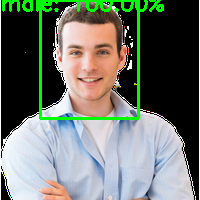

In [8]:
  from google.colab.patches import cv2_imshow
face, confidence = cv.detect_face(image)
padding = 20

for i in face:
    (x, y) = max(0, i[0]-padding), max(0, i[1]-padding)
    (x2, y2) = min(image.shape[1]-1, i[2]+padding), min(image.shape[0]-1,i[3]+padding)
    cv2.rectangle(image, (x, y), (x2, y2), (0, 255, 0), 2)
    crop = np.copy(image[y:y2, x:x2])
    (label, confidence) = cv.detect_gender(crop)
    idx = np.argmax(confidence)
    label = label[idx]
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
    Y = y - 10 if y -10 > 10 else y + 10
    cv2.putText(image, label, (y, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()